In [266]:
from sklearn.linear_model import SGDRegressor
from random import sample
from functools import lru_cache
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from tqdm import tqdm
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

from sklearn.datasets import make_classification
from sklearn.preprocessing import minmax_scale
from scipy.stats import truncnorm
from scipy.stats import skewnorm

from sklearn.ensemble import GradientBoostingClassifier

SEED = 42

random.seed(SEED)
np.random.seed(SEED)

In [3]:
dataset_len = 1000

(array([32., 50., 78., 52., 76., 40., 80., 45., 40., 71., 37., 59., 26.,
        51., 22., 32., 18., 19., 28., 21., 31.,  7., 15., 11.,  7., 14.,
         6.,  9.,  3.,  4.,  1.,  4.,  2.,  2.,  4.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([18.  , 19.44, 20.88, 22.32, 23.76, 25.2 , 26.64, 28.08, 29.52,
        30.96, 32.4 , 33.84, 35.28, 36.72, 38.16, 39.6 , 41.04, 42.48,
        43.92, 45.36, 46.8 , 48.24, 49.68, 51.12, 52.56, 54.  , 55.44,
        56.88, 58.32, 59.76, 61.2 , 62.64, 64.08, 65.52, 66.96, 68.4 ,
        69.84, 71.28, 72.72, 74.16, 75.6 , 77.04, 78.48, 79.92, 81.36,
        82.8 , 84.24, 85.68, 87.12, 88.56, 90.  ]),
 <BarContainer object of 50 artists>)

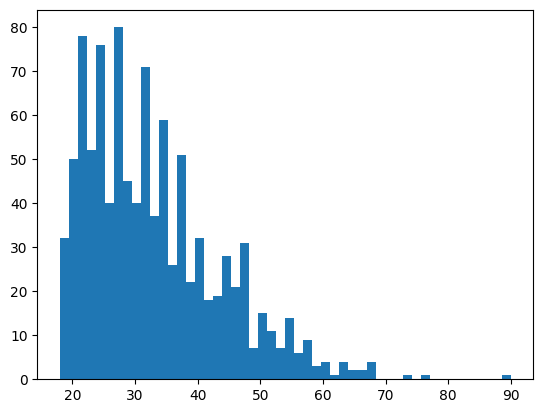

In [4]:
skewness = 30

age = skewnorm.rvs(a = skewness, size=dataset_len)  #Skewnorm function
age = minmax_scale(age, feature_range=(18, 90))
age = age.round()
plt.hist(age, bins=50)

In [91]:
df_data = pd.DataFrame(age, columns=['age'])
df_data

,age
0,29.0
1,21.0
2,31.0
3,46.0
4,23.0
...,...
995,23.0
996,52.0
997,30.0
998,29.0


In [136]:
# Service engage type
purchase_type_and_description = [
    "Electronics: Products such as smartphones, laptops, tablets, TVs, and gaming consoles",
    "Fashion: Clothing, shoes, handbags, accessories, and jewelry",
    "Beauty and personal care: Makeup, skincare, haircare, and grooming products",
    "Home and kitchen: Appliances, furniture, home decor, and cookware",
    "Sports and fitness: Athletic clothing, equipment, and supplements",
    "Toys and games: Board games, puzzles, action figures, and dolls",
    "Books and media: Fiction and non-fiction books, magazines, and DVDs",
    "Food and beverages: Snacks, drinks, and packaged foods",
    "Health and wellness: Vitamins, supplements, and medical devices",
    "Automotive: Cars, motorcycles, bicycles, and accessories",
    "Pet supplies: Products such as food, toys, and accessories for dogs, cats, and other pets",
    "Office supplies: Stationery, printers, and office furniture",
    "Music: Instruments, sheet music, and audio equipment",
    "Travel and leisure: Luggage, travel accessories, and camping gear",
    "Art and crafts: Supplies for drawing, painting, and crafting",
    "Garden and outdoor: Tools, planters, and outdoor furniture",
    "Baby and kids: Clothing, toys, and baby gear",
    "Industrial and scientific: Laboratory equipment, machinery, and scientific instruments",
    "Party supplies: Decorations, party favors, and supplies for hosting events",
    "Education and learning: Products such as textbooks, online courses, educational toys, and educational software for learners of all ages"
]

purchase_type = ['electronics',
 'fashion',
 'beauty and personal care',
 'home and kitchen',
 'sports and fitness',
 'toys and games',
 'books and media',
 'food and beverages',
 'health and wellness',
 'automotive',
 'pet supplies',
 'office supplies',
 'music',
 'travel and leisure',
 'art and crafts',
 'garden and outdoor',
 'baby and kids',
 'industrial and scientific',
 'party supplies',
 'education and learning']

bonus_type = [
    'welcome',
    'loyalty',
    'discount',
    'cashback',
    'up-sell',
    'gift',
    'early-access',
]

purchase_id_to_amount_range = {
    0: ['Electronics', range(50, 10_000)],
    1: ['Fashion', range(10, 10_000)],
    2: ['Beauty and personal care', range(5, 500)],
    3: ['Home and kitchen', range(10, 20_000)],
    4: ['Sports and fitness', range(5, 5_000)],
    5: ['Toys and games', range(5, 1000)],
    6: ['Books and media', range(5, 1000)],
    7: ['Food and beverages', range(1, 100)],
    8: ['Health and wellness', range(5, 1000)],
    9: ['Automotive', range(5_000, 100_000)],
    10: ['Pet supplies', range(5, 1000)],
    11: ['Office supplies', range(1, 10_000)],
    12: ['Music', range(50, 10_000)],
    13: ['Travel and leisure', range(50, 10_000)],
    14: ['Art and crafts', range(5, 1000)],
    15: ['Garden and outdoor', range(10, 20_000)],
    16: ['Baby and kids', range(5, 1_000)],
    17: ['Industrial and scientific', range(10, 100_000)],
    18: ['Party supplies', range(5, 1_000)],
    19: ['Education and learning', range(10, 10_000)]
 }

id2purchaseName = { i : desc for i, desc in enumerate(purchase_type) }
purchaseName2id = { desc : i for i, desc in enumerate(purchase_type) }
id2bonusName = { i : desc for i, desc in enumerate(bonus_type) }
bonusName2id = { desc : i for i, desc in enumerate(bonus_type) }
id2purchaseName

{0: 'electronics',
 1: 'fashion',
 2: 'beauty and personal care',
 3: 'home and kitchen',
 4: 'sports and fitness',
 5: 'toys and games',
 6: 'books and media',
 7: 'food and beverages',
 8: 'health and wellness',
 9: 'automotive',
 10: 'pet supplies',
 11: 'office supplies',
 12: 'music',
 13: 'travel and leisure',
 14: 'art and crafts',
 15: 'garden and outdoor',
 16: 'baby and kids',
 17: 'industrial and scientific',
 18: 'party supplies',
 19: 'education and learning'}

In [132]:
def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

In [269]:
# Purchase history generation {purchase_type, amount} random purchase_type, random amount
min_number_purchase = 0
max_number_purchase = 50
min_amount_bonus_points_available = 0
max_amount_bonus_points_available = 99_999_999
min_amount_assets_available = 0
max_amount_assets_available = 99_999_999
min_number_transactions = 0
max_number_transactions = 99_999_999

def generate_purchase_history(row):
    number_of_purchases = np.random.randint(min_number_purchase, max_number_purchase, 1)[0]
    purchase_preferences = np.random.randint(0, len(purchase_id_to_amount_range), 1)[0] 
    truncated_normal = get_truncated_normal(mean=purchase_preferences, sd=2, low=0, upp=len(purchase_id_to_amount_range)-1)
    indices = truncated_normal.rvs(number_of_purchases).round()
    bonuses_available = sample(bonus_type, random.randint(0, len(bonus_type)))
    current_purchase_type = sample(purchase_type, 1)[0]
    purchase_history = []
    purchase_history_names = []
    bonuses_to_offer = sample(bonuses_available, random.randint(0, len(bonuses_available)))
    rating = np.random.uniform(1,5) 
    for purchase_id in indices:
        purchase_name, range = purchase_id_to_amount_range[purchase_id]
        purchase_history.append([purchase_name, np.random.randint(range[0], range[-1]+1, 1)[0]])
        purchase_history_names.append(purchase_name)
    row['purchase_history'] = purchase_history
    row['current_purchase_type'] = current_purchase_type
    row['bonuses_available'] = bonuses_available
    row['bonuses_to_offer'] = bonuses_to_offer
    row['rating'] = rating
    
    # if 'welcome' in bonuses_available:
    #     if current_purchase_type not in purchase_history_names:
    #         rand = np.random.randint(0, 100)
    #         if rand < 75:
    #             bonuses_to_offer.append('welcome')
    # if 'loyalty' in bonuses_available:
    #     pass
    return row


df_data = df_data.apply(generate_purchase_history, axis = 1 )
df_data

,age,purchase_history,current_purchase_type,bonuses_available,bonuses_to_offer,rating
0,29.0,"[[Education and learning, 4417], [Industrial a...",fashion,"[early-access, cashback]",[],3.620214
1,21.0,"[[Office supplies, 6316], [Pet supplies, 580],...",education and learning,"[gift, discount, early-access, cashback, up-se...","[early-access, loyalty, discount, gift, up-sel...",1.648692
2,31.0,"[[Sports and fitness, 2371], [Toys and games, ...",industrial and scientific,"[early-access, gift, welcome, cashback]",[],3.159684
3,46.0,"[[Sports and fitness, 3375], [Books and media,...",music,[],[],3.887129
4,23.0,"[[Office supplies, 6054], [Travel and leisure,...",toys and games,[],[],3.146090
...,...,...,...,...,...,...
995,23.0,"[[Office supplies, 4731], [Party supplies, 443...",party supplies,"[welcome, discount, early-access, up-sell, cas...","[welcome, early-access, discount, up-sell]",2.496030
996,52.0,"[[Baby and kids, 248], [Garden and outdoor, 15...",books and media,"[early-access, cashback, loyalty]","[cashback, loyalty, early-access]",1.405411
997,30.0,"[[Pet supplies, 131], [Pet supplies, 663], [Of...",music,[loyalty],[],4.596623
998,29.0,"[[Travel and leisure, 8312], [Industrial and s...",baby and kids,"[gift, loyalty]",[],3.754106


In [271]:
X = df_data[['age', 'purchase_history', 'current_purchase_type', 'bonuses_available']]
y = df_data[['bonuses_to_offer', 'rating']]
X, y

(      age                                   purchase_history  \
 0    29.0  [[Education and learning, 4417], [Industrial a...   
 1    21.0  [[Office supplies, 6316], [Pet supplies, 580],...   
 2    31.0  [[Sports and fitness, 2371], [Toys and games, ...   
 3    46.0  [[Sports and fitness, 3375], [Books and media,...   
 4    23.0  [[Office supplies, 6054], [Travel and leisure,...   
 ..    ...                                                ...   
 995  23.0  [[Office supplies, 4731], [Party supplies, 443...   
 996  52.0  [[Baby and kids, 248], [Garden and outdoor, 15...   
 997  30.0  [[Pet supplies, 131], [Pet supplies, 663], [Of...   
 998  29.0  [[Travel and leisure, 8312], [Industrial and s...   
 999  29.0  [[Art and crafts, 990], [Travel and leisure, 4...   
 
          current_purchase_type  \
 0                      fashion   
 1       education and learning   
 2    industrial and scientific   
 3                        music   
 4               toys and games   
 ..     

In [286]:
a = [1]
a.extend([2,3])
a

[1, 2, 3]

In [284]:
def vectorize(row):
    return [row.age]
df_data.apply(vectorize, axis=1).to_list()

[[29.0],
 [21.0],
 [31.0],
 [46.0],
 [23.0],
 [23.0],
 [48.0],
 [33.0],
 [27.0],
 [28.0],
 [26.0],
 [27.0],
 [24.0],
 [54.0],
 [49.0],
 [29.0],
 [38.0],
 [24.0],
 [36.0],
 [44.0],
 [46.0],
 [23.0],
 [20.0],
 [43.0],
 [28.0],
 [21.0],
 [40.0],
 [26.0],
 [29.0],
 [25.0],
 [30.0],
 [52.0],
 [19.0],
 [38.0],
 [34.0],
 [40.0],
 [22.0],
 [55.0],
 [43.0],
 [23.0],
 [33.0],
 [22.0],
 [20.0],
 [24.0],
 [46.0],
 [31.0],
 [27.0],
 [37.0],
 [26.0],
 [50.0],
 [24.0],
 [26.0],
 [31.0],
 [30.0],
 [37.0],
 [35.0],
 [34.0],
 [24.0],
 [25.0],
 [36.0],
 [27.0],
 [24.0],
 [38.0],
 [42.0],
 [33.0],
 [43.0],
 [21.0],
 [38.0],
 [25.0],
 [30.0],
 [25.0],
 [47.0],
 [19.0],
 [47.0],
 [66.0],
 [33.0],
 [19.0],
 [25.0],
 [21.0],
 [54.0],
 [23.0],
 [25.0],
 [46.0],
 [27.0],
 [33.0],
 [28.0],
 [36.0],
 [25.0],
 [29.0],
 [28.0],
 [21.0],
 [36.0],
 [31.0],
 [25.0],
 [26.0],
 [46.0],
 [24.0],
 [22.0],
 [19.0],
 [23.0],
 [44.0],
 [28.0],
 [24.0],
 [34.0],
 [21.0],
 [26.0],
 [54.0],
 [21.0],
 [23.0],
 [19.0],
 [54.0],
 

In [275]:
clf = GradientBoostingClassifier()
clf.fit([[1],[2],[3]], [3,3,2])

GradientBoostingClassifier()

In [277]:
clf.predict([[3]])

array([2])